In [0]:
from google.colab import files
upload = files.upload()

Saving chrun_modeling.csv to chrun_modeling (1).csv


In [0]:
!ls


'chrun_modeling (1).csv'   chrun_modeling.csv   sample_data


In [0]:
!pwd


/content


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
data = pd.read_csv('chrun_modeling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
print("Total shape   : ", data.shape)
print("*"*50)
print("Total Columns : ", data.columns )
print("*"*50)
print(data.info)

Total shape   :  (10000, 14)
**************************************************
Total Columns :  Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
**************************************************
<bound method DataFrame.info of       RowNumber  CustomerId    Surname  ...  IsActiveMember EstimatedSalary Exited
0             1    15634602   Hargrave  ...               1       101348.88      1
1             2    15647311       Hill  ...               1       112542.58      0
2             3    15619304       Onio  ...               0       113931.57      1
3             4    15701354       Boni  ...               0        93826.63      0
4             5    15737888   Mitchell  ...               1        79084.10      0
...         ...         ...        ...  ...             ...             ...    ...
9995       999

In [0]:
X = data.iloc[:,3:13].values
y = data.iloc[:,13].values
len(X[:10][0])

10

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [0]:
label_encoder_x_1 = LabelEncoder()
X[:,1] = label_encoder_x_1.fit_transform(X[:,1])

label_encoder_x_2 = LabelEncoder()
X[:,2] = label_encoder_x_2.fit_transform(X[:,2])

tranformer = ColumnTransformer(transformers=[("Geography", OneHotEncoder(), [1])], remainder='passthrough')
X = tranformer.fit_transform(X.tolist())
X = X.astype('float64') 

In [0]:
X[:5][0]

array([1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 6.1900000e+02,
       0.0000000e+00, 4.2000000e+01, 2.0000000e+00, 0.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0134888e+05])

In [0]:
from sklearn.model_selection import train_test_split


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Model Building using Keras

In [0]:
import keras

Using TensorFlow backend.


In [0]:
from keras.models import  Sequential
from keras.layers import Dense

In [0]:
cls= Sequential()

#Input layers
cls.add(Dense(output_dim=6, init = 'uniform', activation='relu', input_dim = 12))

#Middle or Hidden Layers
cls.add(Dense(output_dim = 6, init= 'uniform', activation= 'relu'))

# Output Layers
cls.add(Dense(output_dim = 1, init='uniform', activation= 'sigmoid'))

#Compile model
cls.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=12, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


In [0]:
## Traning the model now
cls.fit(X_train, y_train, batch_size=20, epochs=100)





Epoch 1/100





8000/8000 [==============================] - 10s 1ms/step - loss: 0.5632 - acc: 0.7876
Epoch 2/100
8000/8000 [==============================] - 2s 247us/step - loss: 0.5219 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 2s 247us/step - loss: 0.5176 - acc: 0.7960
Epoch 4/100
8000/8000 [==============================] - 2s 224us/step - loss: 0.5139 - acc: 0.7960
Epoch 5/100
8000/8000 [==============================] - 2s 240us/step - loss: 0.5090 - acc: 0.7960
Epoch 6/100
8000/8000 [==============================] - 2s 213us/step - loss: 0.5066 - acc: 0.7960
Epoch 7/100
8000/8000 [==============================] - 2s 248us/step - loss: 0.5064 - acc: 0.7960
Epoch 8/100
8000/8000 [==============================] - 2s 239us/step - loss: 0.5061 - acc: 0.7960
Epoch 9/100
8000/8000 [==============================] - 2s 238us/step - loss: 0.5047 - acc: 0.7960
Epoch 10/100
8000/8000 [==============================] - 2s 235us/step - loss: 0.5067 - acc:

In [0]:
y_pred = cls.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [0]:
len(y_pred)

2000

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1595,    0],
       [ 405,    0]])

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
ac = accuracy_score(y_test, y_pred)
ac*100

79.75

In [0]:
## CNN algorithm

In [0]:
import keras
import tensorflow as tf
from keras.datasets import cifar10
from tensorflow import keras
import numpy as np
from tensorflow.keras.optimizers import RMSprop

In [0]:
(x_train, y_train), (x_test,y_test) = cifar10.load_data()

In [0]:
import matplotlib.pyplot as plt


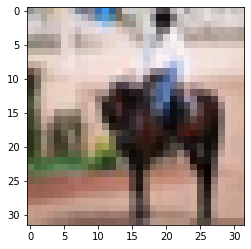

In [21]:
plt.imshow(x_train[11])

In [22]:
print(x_train[11])

[[[142 149 152]
  [172 172 167]
  [176 168 154]
  ...
  [216 212 211]
  [198 194 193]
  [205 202 200]]

 [[191 190 192]
  [196 192 190]
  [174 166 159]
  ...
  [229 222 220]
  [222 215 213]
  [217 210 207]]

 [[220 212 212]
  [217 209 208]
  [192 183 182]
  ...
  [224 214 209]
  [225 214 210]
  [218 208 203]]

 ...

 [[197 152 136]
  [196 152 135]
  [201 156 140]
  ...
  [200 165 146]
  [199 165 146]
  [205 164 150]]

 [[196 157 139]
  [191 152 135]
  [193 154 136]
  ...
  [198 164 144]
  [199 165 145]
  [201 161 146]]

 [[186 150 133]
  [182 147 130]
  [174 139 121]
  ...
  [158 124 105]
  [158 125 106]
  [163 125 111]]]


In [23]:
print(y_train[11])

[7]


In [24]:
num_classes = 10
print("Before :", y_test[0])

y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

print("After :", y_test[0])

x_train = x_train/255.0
x_test = x_test/255.0

#print(y_train[11])


Before : [3]
After : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [0]:
## Model initilization
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics= ['acc'])


In [27]:
model.fit(x_train, y_train, epochs=30)

Train on 50000 samples
Epoch 1/30
50000/50000 [==============================] - 8s 157us/sample - loss: 1.0880 - acc: 0.8742
Epoch 2/30
50000/50000 [==============================] - 8s 154us/sample - loss: 0.2615 - acc: 0.9038
Epoch 3/30
50000/50000 [==============================] - 8s 154us/sample - loss: 0.2525 - acc: 0.9064
Epoch 4/30
50000/50000 [==============================] - 8s 152us/sample - loss: 0.2470 - acc: 0.9076
Epoch 5/30
50000/50000 [==============================] - 8s 156us/sample - loss: 0.2437 - acc: 0.9087
Epoch 6/30
50000/50000 [==============================] - 8s 154us/sample - loss: 0.2418 - acc: 0.9090
Epoch 7/30
50000/50000 [==============================] - 8s 153us/sample - loss: 0.2403 - acc: 0.9102
Epoch 8/30
50000/50000 [==============================] - 8s 157us/sample - loss: 0.2390 - acc: 0.9104
Epoch 9/30
50000/50000 [==============================] - 8s 155us/sample - loss: 0.2384 - acc: 0.9106
Epoch 10/30
50000/50000 [=========================

In [0]:

## Prediction
import numpy as np
from google.colab import files
from keras.preprocessing import image


In [29]:
!pwd


/content


In [33]:
uploaded = files.upload()
for fn in uploaded.keys():

  path = '/content/'+fn
  img = image.load_img(path, target_size=(32,32))
  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes)



classes2 = np.argmax(classes, axis=1)

if classes2[0] == 0:
  print('Airplane')
elif classes2[0] == 1:
  print('Automobile')
elif classes2[0] == 2:
  print('Bird')
elif classes2[0] == 3:
  print('Cat')
elif classes2[0] == 4:
  print('Deer')
elif classes2[0] == 5:
  print('Dog')
elif classes2[0] == 6:
  print('Frog')
elif classes2[0] == 7:
  print('Horse')
elif classes2[0] == 8:
  print('Sheep')
elif classes2[0] == 9:
  print('Truck')
else:
  print("Can't be Recognized")

print("DONE!!!")





Saving sheep.jpg to sheep.jpg
[[0.8485334  0.         0.15146656 0.         0.         0.
  0.         0.         0.         0.        ]]
Airplane
DONE!!!
